In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
from time import time
import gensim
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
import pandas as pd

# Load data from CSV file into a DataFrame
df = pd.read_csv("/content/drive/MyDrive/Reviews.csv")

# Display the first few rows of the DataFrame
df.head()


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
#Filter rows where HelpfulnessDenominator is 0 and calculate the resulting DataFrame shape.
df[df.HelpfulnessDenominator == 0].shape

'''So, filtering rows where HelpfulnessDenominator is 0 would essentially filter out reviews where no users
have indicated whether they found the review helpful or not. This could be useful for various reasons,
such as focusing on reviews that have received feedback from users.'''



'So, filtering rows where HelpfulnessDenominator is 0 would essentially filter out reviews where no users\nhave indicated whether they found the review helpful or not. This could be useful for various reasons,\nsuch as focusing on reviews that have received feedback from users.'

In [ ]:
# Define the number of reviews to extract from each rating class
num_reviews_per_class = 29770

# Create empty list to store balanced data
balanced_data1 = []

# Iterate through each rating class
for score in range(1, 6):
    # Filter reviews for the current rating class and select a fixed number of reviews
    reviews_for_score = df[df['Score'] == score].head(num_reviews_per_class)

    # Append selected reviews to the balanced data list
    balanced_data1.append(reviews_for_score)

# Concatenate the balanced data DataFrames
balanced_data1 = pd.concat(balanced_data1, ignore_index=True)

# Shuffle the balanced dataset
balanced_data1 = balanced_data1.sample(frac=1).reset_index(drop=True)

# Display the balanced dataset
print("Balanced Dataset:")
print(balanced_data1.head())
print("\nNumber of data points in our data:", len(balanced_data1))

# Print sample dataset from each class (1 to 5)
for score in range(1, 6):
    print(f"\nSample dataset for rating class {score}:")
    sample_data = balanced_data1[balanced_data1['Score'] == score].sample(5)
    print(sample_data)


Balanced Dataset:
       Id   ProductId          UserId       ProfileName  HelpfulnessNumerator  \
0   10443  B005LKCWU0  A2199YBFAFQFCD                JG                     0   
1  333511  B00188S3PM  A2BUEYP4GNZ5P8          MrsLenaC                     0   
2   94972  B0070CGXN4  A2WJH1QD0M9X51  Heather Ferguson                     0   
3   56219  B0039ZOZ86  A1UASXJKH475MV        J. Withers                     7   
4  511179  B004FGWU9O  A3T4UQRGKU4SPG  Cherlin "Artist"                     0   

   HelpfulnessDenominator  Score        Time  \
0                       0      1  1330128000   
1                       0      2  1322524800   
2                       0      4  1349395200   
3                      11      3  1296172800   
4                       0      2  1298419200   

                                             Summary  \
0                                    Loaded with MSG   
1                                      Fenugreek tea   
2                 A perfectly pleasant

In [ ]:
# Function to partition scores into positive (0) and negative (1)
def partition(x):
    return 0 if x > 3 else 1

# Create a copy of the DataFrame
balanced_data2 = balanced_data1.copy()

# Apply the partitioning function to the 'Score' column in the copy
balanced_data2['Score'] = balanced_data2['Score'].map(partition)

# Print the first few rows of the new DataFrame after applying the partitioning function
print("Data After Partitioning:")
print(balanced_data2.head())


#1 is negative review
#0 is positive review

Data After Partitioning:
       Id   ProductId          UserId       ProfileName  HelpfulnessNumerator  \
0   10443  B005LKCWU0  A2199YBFAFQFCD                JG                     0   
1  333511  B00188S3PM  A2BUEYP4GNZ5P8          MrsLenaC                     0   
2   94972  B0070CGXN4  A2WJH1QD0M9X51  Heather Ferguson                     0   
3   56219  B0039ZOZ86  A1UASXJKH475MV        J. Withers                     7   
4  511179  B004FGWU9O  A3T4UQRGKU4SPG  Cherlin "Artist"                     0   

   HelpfulnessDenominator  Score        Time  \
0                       0      1  1330128000   
1                       0      1  1322524800   
2                       0      0  1349395200   
3                      11      1  1296172800   
4                       0      1  1298419200   

                                             Summary  \
0                                    Loaded with MSG   
1                                      Fenugreek tea   
2                 A perfectly p

In [ ]:
# Filter out rows where 'Score' is not equal to 3  'UserId' is "AR5J8UI46CURR"
balanced_data3 = balanced_data2[(balanced_data2['Score'] != 3) | (balanced_data2['UserId'] == "AR5J8UI46CURR")]

# Sort the filtered DataFrame by 'ProductId'
balanced_data3 = balanced_data3.sort_values(by='ProductId')

# Print the filtered and sorted DataFrame
print("Filtered and Sorted DataFrame:")
print(balanced_data3.head())




Filtered and Sorted DataFrame:
           Id   ProductId          UserId            ProfileName  \
60178  150526  0006641040  A3E9QZFE9KXH8J            R. Mitchell   
36762  150507  0006641040  A1S4A3IQ2MU7V4  sally sue "sally sue"   
24738  150511  0006641040  A1C9K534BCI9GO     Laura Purdie Salas   
2212   150528  0006641040   AGQWHPNDZGUD0                 Bolt81   
30627  150522  0006641040  A1S3C5OFU508P3      Charles Ashbacher   

       HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
60178                    11                      18      1  1129507200   
36762                     1                       1      0  1191456000   
24738                     0                       0      0  1344211200   
2212                      0                       1      1  1296864000   
30627                     0                       0      0  1219536000   

                                                 Summary  \
60178                             awesome book poor siz

In [ ]:
# Sorting data according to ProductId in ascending order
balanced_data4 = balanced_data3.sort_values(by='ProductId', ascending=True)
print("Sorted DataFrame:")



Sorted DataFrame:


In [ ]:
# Deduplication of entries based on certain columns
balanced_data5 = balanced_data4.drop_duplicates(subset=["UserId", "ProfileName", "Time", "Text"], keep='first')

''' it was noted that in the two rows presented below, the HelpfulnessNumerator surpasses the HelpfulnessDenominator, a
scenario that is impractical. Consequently, these two rows have been omitted from the computations. This discrepancy is
logically implausible as the numerator cannot exceed the denominator.'''
# Filter out rows where HelpfulnessNumerator is greater than HelpfulnessDenominator
balanced_data6 = balanced_data5[balanced_data5['HelpfulnessNumerator'] <= balanced_data5['HelpfulnessDenominator']]

In [ ]:
from sklearn.model_selection import train_test_split

# Split the balanced_data6 into features (X) and target variable (y)
X = balanced_data6['Text']  # Features
y = balanced_data6['Score']  # Target variable

# Step 1: Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (93648,)
Shape of X_test: (23412,)
Shape of y_train: (93648,)
Shape of y_test: (23412,)


 # Preprocessing Tasks


In [ ]:
"""Preprocess text by removing HTML tags, punctuation, special characters, and non-alphanumeric characters."""

import nltk
from nltk.tokenize import word_tokenize
import regex as re


# Preprocess text function
def preprocess_text(text):

    # Remove HTML tags
    clean_text = re.sub(r'<.*?>', '', text)
    # Remove punctuation, special characters, and non-alphanumeric characters
    clean_text = re.sub(r'[^\w\s]', '', clean_text)
    return clean_text

# Tokenization function
def tokenize_text(text):
    """Tokenize text using NLTK word_tokenize."""
    tokens = word_tokenize(text)
    return tokens


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# removing stop words but keeping some important for the task
from nltk.corpus import stopwords

# Load English stopwords from NLTK
stop_words = set(stopwords.words('english'))
# Words to exclude from stopwords
excluding = {'against', 'not', 'don', "don't", 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't",
             'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't",
             'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shouldn', "shouldn't", 'wasn',
             "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"}

# Exclude specified words from stopwords
stop_words = stop_words - excluding


# Function to remove stop words from text
def remove_stopwords(text):
    """Remove stopwords from text."""
    tokens = text.split()  # Tokenize text into words
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Filter out stopwords
    filtered_text = ' '.join(filtered_tokens)  # Join filtered tokens back into text
    return filtered_text

In [ ]:
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on text
def lemmatize_text(text):
    """Lemmatize text using NLTK WordNetLemmatizer."""
    tokens = nltk.word_tokenize(text)  # Tokenize text into words
    lemmatized_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]  # Lemmatize tokens (assumes verbs)
    lemmatized_text = ' '.join(lemmatized_tokens)  # Join lemmatized tokens back into text
    return lemmatized_text

In [ ]:
#Removing contractions from data
import re

# Dictionary of English contractions
contractions_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "I'd": "I would",
    "I'd've": "I would have",
    "I'll": "I will",
    "I'll've": "I will have",
    "I'm": "I am",
    "I've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
}

In [ ]:
#Removing the contractions from the data
def expand_contractions(text, contractions_dict):
    # Regular expression for finding contractions
    contractions_pattern = re.compile(r'\b(' + '|'.join(contractions_dict.keys()) + r')\b', flags=re.IGNORECASE)

    # Preprocess the keys of contractions_dict to lowercase
    processed_dict = {key.lower(): value for key, value in contractions_dict.items()}

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = processed_dict.get(match.lower(), match)
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [ ]:
nltk.download ('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import nltk
import subprocess

# Download and unzip wordnet
try:
    nltk.data.find('wordnet.zip')
except:
    nltk.download('wordnet', download_dir='/kaggle/working/')
    command = "unzip /kaggle/working/corpora/wordnet.zip -d /kaggle/working/corpora"
    subprocess.run(command.split())
    nltk.data.path.append('/kaggle/working/')

#  import the NLTK resources as usual
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /kaggle/working/...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Apply preprocessing functions to X_train
X_train_preprocessed = X_train.apply(preprocess_text)
X_train_preprocessed = X_train_preprocessed.apply(remove_stopwords)
X_train_preprocessed = X_train_preprocessed.apply(lemmatize_text)
X_train_preprocessed = X_train_preprocessed.apply(expand_contractions, contractions_dict=contractions_dict)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the preprocessed training data
X_train_counts = count_vectorizer.fit_transform(X_train_preprocessed)

# Find the vocabulary size
vocabulary_size = len(count_vectorizer.vocabulary_)

print("Vocabulary Size of traing data (X):", vocabulary_size)


Vocabulary Size of traing data (X): 125747


In [ ]:
# Apply preprocessing functions to X_test
X_test_preprocessed = X_test.apply(preprocess_text)
X_test_preprocessed = X_test_preprocessed.apply(remove_stopwords)
X_test_preprocessed = X_test_preprocessed.apply(lemmatize_text)
X_test_preprocessed = X_test_preprocessed.apply(expand_contractions,  contractions_dict=contractions_dict)

In [ ]:
import pickle
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

# Initialize CountVectorizer with custom parameters
count_vectorizer = CountVectorizer(max_df=0.7, min_df=5, ngram_range=(1, 2), stop_words=None)

# Fit and transform X_train
X_train_counts = count_vectorizer.fit_transform(X_train_preprocessed)

# Initialize TfidfTransformer
tfidf_transformer = TfidfTransformer()

# Apply TF-IDF transformation to the BoW matrix
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Save the trained objects and data into a dictionary
model_data = {
    'count_vectorizer': count_vectorizer,
    'tfidf_transformer': tfidf_transformer,
    'X_train_tfidf': X_train_tfidf,
    'preprocessing_steps': "Define your preprocessing steps here if any."
}

# Save the dictionary as a pickled file
with open('tfidf_model3.pkl', 'wb') as f:
    pickle.dump(model_data, f)


In [ ]:
fnc = '/content/drive/My Drive/tfidf_transformer.pkl'
dump(tfidf_transformer,fnc)

['/content/drive/My Drive/tfidf_transformer.pkl']

# Naive Bayes

In [ ]:
import time
from sklearn.naive_bayes import MultinomialNB

start_time1 = time.time()  # Record the start time

# Train the Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

end_time1 = time.time()  # Record the end time
elapsed_time1 = end_time1 - start_time1  # Calculate the elapsed time

print("Training time:", elapsed_time1, "seconds")




Training time: 0.058824777603149414 seconds


In [ ]:
# Transform X_test using the fitted vectorizers
X_test_counts = count_vectorizer.transform(X_test_preprocessed)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

# Make predictions on the test data
y_pred = nb_model.predict(X_test_tfidf)


In [ ]:
#measuring the accuracy of the data set
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8291901588928754


In [ ]:
# Importing the classification_report function from scikit-learn's metrics module
from sklearn.metrics import classification_report

# Assuming y_pred contains the predicted labels for X_test

# Generating a classification report by comparing the true labels (y_test) with the predicted labels (y_pred)
report = classification_report(y_test, y_pred)

# Printing the classification report
print(report)



              precision    recall  f1-score   support

           0       0.87      0.72      0.79     10314
           1       0.81      0.91      0.86     13098

    accuracy                           0.83     23412
   macro avg       0.84      0.82      0.82     23412
weighted avg       0.83      0.83      0.83     23412



In [ ]:
# Importing necessary functions from scikit-learn's metrics module
from sklearn.metrics import roc_curve, roc_auc_score

# Calculating the ROC curve, which plots the true positive rate (TPR) against the false positive rate (FPR)
# The roc_curve function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculating the Area Under the Curve (AUC) score, which quantifies the overall performance of the classifier
# The roc_auc_score function takes the true labels (y_test) and the predicted probabilities or scores (y_pred) as input
auc = roc_auc_score(y_test, y_pred)

# Printing the Area Under the Curve (AUC) score
print("AUC Score:", auc)


AUC Score: 0.817677802924941


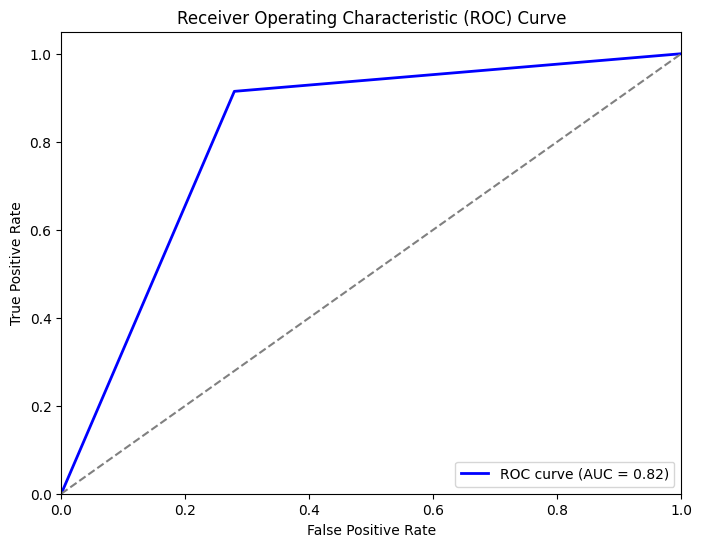

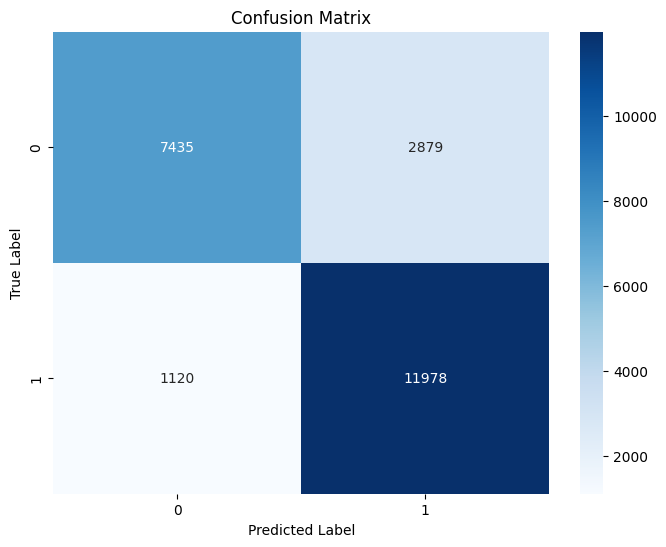

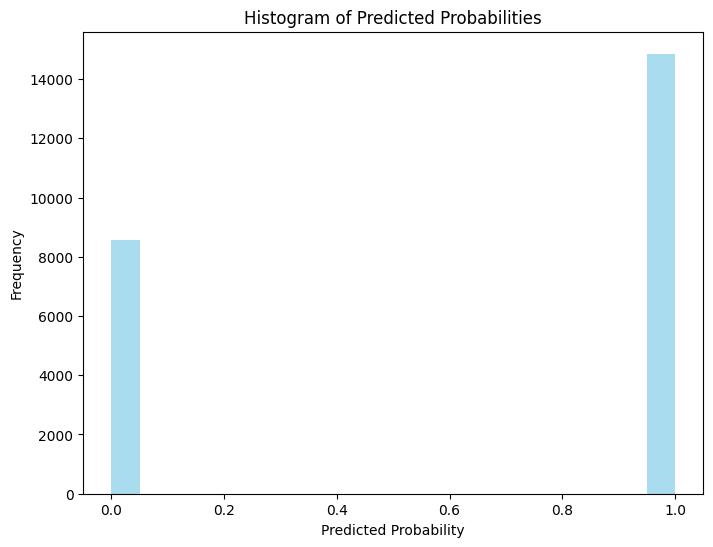

In [ ]:
# Importing necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot histogram of predicted probabilities
plt.figure(figsize=(8, 6))
plt.hist(y_pred, bins=20, color='skyblue', alpha=0.7)
plt.title('Histogram of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# installing LIME
!pip install lime



In [148]:
index_values = X_test_preprocessed.index.tolist()
print(index_values)

# Choose a random index from the test set
random_index = random.choice(index_values)

# Choose a random sample from the test set

sample_text = X_test_preprocessed[random_index]
print(sample_text)

[100849, 37821, 131516, 83051, 133847, 62679, 124936, 23771, 29689, 86943, 83030, 124811, 46556, 47796, 48098, 124849, 103393, 142071, 14794, 128846, 137247, 129701, 110711, 36965, 129556, 37720, 109951, 56763, 130059, 116295, 32135, 145285, 115527, 41515, 126748, 56766, 103057, 131150, 94157, 118872, 100519, 62476, 95925, 13510, 76602, 120909, 128164, 132493, 127696, 19642, 15821, 3809, 86324, 42787, 25061, 73141, 47704, 21749, 122072, 130922, 85694, 127257, 32406, 53178, 61643, 69275, 46697, 105162, 32087, 130717, 89716, 11204, 86461, 114732, 51112, 51109, 23680, 102056, 100558, 92996, 138053, 140382, 32170, 141225, 69000, 12956, 129832, 116400, 81583, 8243, 25410, 125353, 42744, 146751, 8098, 39935, 39688, 52408, 103631, 44295, 131280, 10910, 126057, 114775, 67221, 35485, 143656, 32755, 41112, 131850, 88393, 30852, 108638, 80115, 12071, 116078, 10448, 16606, 80713, 123698, 89406, 134812, 72237, 122425, 21706, 55186, 67945, 129366, 134434, 39249, 23677, 7985, 15998, 111322, 141268, 2

In [ ]:
# from lime import lime_text
# from lime.lime_text import LimeTextExplainer

# # Initialize LIME explainer
# explainer = LimeTextExplainer()

# # Choose a random index from the test set
# random_index = random.choice(index_values)

# # Choose a random sample from the test set

# sample_text = X_test_preprocessed[random_index]
# print(sample_text)

# # Define a prediction function
# def predict_proba_func(texts):
#     # Transform the text into TF-IDF vectors
#     text_tfidf = tfidf_transformer.transform(count_vectorizer.transform(texts))
#     # Make predictions using the trained Naive Bayes model
#     return nb_model.predict_proba(text_tfidf)


# # Generate explanations for the prediction using LIME
# explanation = explainer.explain_instance(sample_text, predict_proba_func, num_features=10)

# # Display the explanation
# explanation.show_in_notebook(text=True)


# Lime Explanaation of Naïve Bayes

In [152]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

# Initialize LIME explainer
explainer = LimeTextExplainer()

# Choose a random index from the test set
random_index = random.choice(index_values)

# Choose a random sample from the test set
sample_text = X_test_preprocessed[random_index]
print('Review:', sample_text)

# Print the true class
true_class = 'positive' if y_test[random_index] == 0 else 'negative'
print('\nTrue Class:', true_class)

# Define a prediction function
def predict_proba_func(texts):
    # Transform the text into TF-IDF vectors
    text_tfidf = tfidf_transformer.transform(count_vectorizer.transform(texts))
    # Make predictions using the trained Naive Bayes model
    return nb_model.predict_proba(text_tfidf)

# Generate explanations for the prediction using LIME
explanation = explainer.explain_instance(sample_text, predict_proba_func, num_features=10)

# Get the predicted probability
predicted_proba = predict_proba_func([sample_text])[0]

# Get the predicted class
predicted_class_index = predicted_proba.argmax()
predicted_class = 'positive' if predicted_class_index == 0 else 'negative'
print('\nPredicted Class:', predicted_class)

# Print the actual and predicted probabilities
print('Actual Probability:', predicted_proba[y_test[random_index]])
print('Predicted Probability:', predicted_proba[predicted_class_index])

# Display the explanation
explanation.show_in_notebook(text=True)


Review: famous TV doctor recommend use Turffle sea salt popcorn healthy snack try didnt like taste Guess not truffle lover Others may find wondeful product matter taste not anything else

True Class: negative

Predicted Class: negative
Actual Probability: 0.7841436623903804
Predicted Probability: 0.7841436623903804


In [ ]:
#def preprocess_and_predict(review, count_vectorizer, tfidf_transformer, nb_model):
#     # Preprocess the review
#     preprocessed_review = preprocess_text(review)
#     preprocessed_review = remove_stopwords(preprocessed_review)
#     preprocessed_review = lemmatize_text(preprocessed_review)
#     preprocessed_review = expand_contractions(preprocessed_review, contractions_dict=contractions_dict)

#     # Vectorize the preprocessed review
#     preprocessed_review_vectorized = text_to_tfidf(preprocessed_review, count_vectorizer, tfidf_transformer)

#     # Make prediction using the Naive Bayes model
#     nb_probabilities = nb_model.predict_proba(preprocessed_review_vectorized)
#     nb_prediction = np.argmax(nb_probabilities)

#     # Return the prediction
#     if nb_prediction == 0:
#         return "Positive review"
#     else:
#         return "Negative review"

# # Example usage:
# review = "I tried using the product, but it was a complete disaster. The interface is awful, and I couldn't even figure out how to navigate it. Plus, the customer service was terrible. I'm extremely disappointed and will never buy from this company again. #wasteofmoney https://example.com/product123"


# prediction = preprocess_and_predict(review, count_vectorizer, tfidf_transformer, nb_model)
# print("Prediction:", prediction)


Prediction: Negative review


In [ ]:
from joblib import dump
dump(nb_model,'nb_model.pkl')

['nb_model.pkl']

In [ ]:
model_filename = '/content/drive/My Drive/nb_model.pkl'
dump(nb_model, model_filename)

['/content/drive/My Drive/nb_model.pkl']

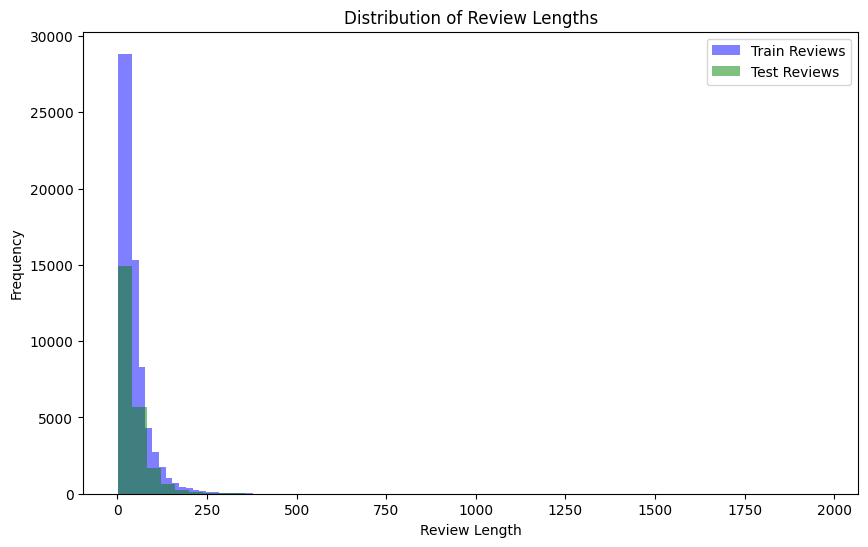

In [96]:
import matplotlib.pyplot as plt

# Compute the length of each review in X_train_preprocessed
train_review_lengths = [len(review.split()) for review in X_train_preprocessed]

# Compute the length of each review in X_test_preprocessed
test_review_lengths = [len(review.split()) for review in X_test_preprocessed]

# Plot the distribution of review lengths
plt.figure(figsize=(10, 6))
plt.hist(train_review_lengths, bins=50, alpha=0.5, color='blue', label='Train Reviews')
plt.hist(test_review_lengths, bins=50, alpha=0.5, color='green', label='Test Reviews')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [97]:
# Compute descriptive statistics for training review lengths
train_mean_length = np.mean(train_review_lengths)
train_median_length = np.median(train_review_lengths)
train_min_length = np.min(train_review_lengths)
train_max_length = np.max(train_review_lengths)

# Compute descriptive statistics for test review lengths
test_mean_length = np.mean(test_review_lengths)
test_median_length = np.median(test_review_lengths)
test_min_length = np.min(test_review_lengths)
test_max_length = np.max(test_review_lengths)

# Print the descriptive statistics
print("Training set review lengths:")
print(f"  Mean: {train_mean_length:.2f}")
print(f"  Median: {train_median_length}")
print(f"  Minimum: {train_min_length}")
print(f"  Maximum: {train_max_length}")

print("\nTest set review lengths:")
print(f"  Mean: {test_mean_length:.2f}")
print(f"  Median: {test_median_length}")
print(f"  Minimum: {test_min_length}")
print(f"  Maximum: {test_max_length}")


Training set review lengths:
  Mean: 44.75
  Median: 32.0
  Minimum: 3
  Maximum: 943

Test set review lengths:
  Mean: 44.49
  Median: 32.0
  Minimum: 3
  Maximum: 1968


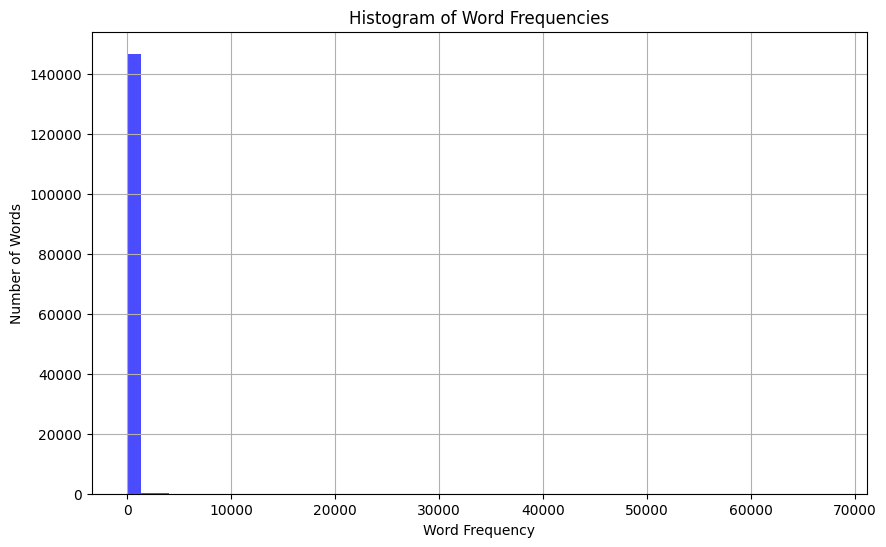

In [98]:
import matplotlib.pyplot as plt
from collections import Counter

# Tokenize the text data
tokenized_data = [word for sentence in X_train_preprocessed for word in sentence.split()]

# Calculate word frequencies
word_frequencies = Counter(tokenized_data)

# Plot a histogram of word frequencies
plt.figure(figsize=(10, 6))
plt.hist(word_frequencies.values(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Word Frequencies')
plt.xlabel('Word Frequency')
plt.ylabel('Number of Words')
plt.grid(True)
plt.show()

In [99]:
# Calculate statistics
total_words = len(tokenized_data)
unique_words = len(word_frequencies)
mean_frequency = sum(word_frequencies.values()) / len(word_frequencies)
most_common_words = word_frequencies.most_common(10)

# Print statistics
print("Total number of words:", total_words)
print("Number of unique words:", unique_words)
print("Mean word frequency:", mean_frequency)
print("Most common words:", most_common_words)


Total number of words: 4190509
Number of unique words: 147156
Mean word frequency: 28.476643833754654
Most common words: [('not', 67757), ('like', 52902), ('taste', 49879), ('flavor', 35802), ('get', 32313), ('good', 31881), ('product', 28842), ('make', 28563), ('use', 28430), ('try', 27560)]


In [120]:
import tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize Tokenizer with the desired number of words
tokenizer = Tokenizer(num_words=30000)

# Fit the tokenizer on the training data
tokenizer.fit_on_texts(X_train_preprocessed)

# Convert text data to sequences
X_train_seq = tokenizer.texts_to_sequences(X_train_preprocessed)
X_test_seq = tokenizer.texts_to_sequences(X_test_preprocessed)


In [121]:
# Pad sequences to ensure uniform length
max_sequence_length = max(len(sequence) for sequence in X_train_seq + X_test_seq)
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length)
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length)

In [122]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [123]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Print model summary
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 1871, 100)         12577500  
                                                                 
 lstm_6 (LSTM)               (None, 32)                17024     
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12594557 (48.04 MB)
Trainable params: 12594557 (48.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
# Train the model
model.fit(X_train_padded, y_train, epochs=5, batch_size=128, validation_data=(X_test_padded, y_test))

Epoch 1/5
732/732 [==============================] - 1171s 2s/step - loss: 0.4069 - accuracy: 0.8190 - val_loss: 0.3964 - val_accuracy: 0.8244
Epoch 2/5
732/732 [==============================] - 1171s 2s/step - loss: 0.3211 - accuracy: 0.8627 - val_loss: 0.4011 - val_accuracy: 0.8284
Epoch 3/5
732/732 [==============================] - 1167s 2s/step - loss: 0.2630 - accuracy: 0.8917 - val_loss: 0.4063 - val_accuracy: 0.8268
Epoch 4/5
732/732 [==============================] - 1160s 2s/step - loss: 0.2128 - accuracy: 0.9134 - val_loss: 0.4428 - val_accuracy: 0.8235
Epoch 5/5
732/732 [==============================] - 1150s 2s/step - loss: 0.1707 - accuracy: 0.9322 - val_loss: 0.5233 - val_accuracy: 0.8184


In [127]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)

# Print the test set accuracy
print("Test set accuracy:", accuracy)


732/732 [==============================] - 105s 143ms/step - loss: 0.5233 - accuracy: 0.8184
Test set accuracy: 0.8183837532997131


In [128]:
_, train_accuracy = model.evaluate(X_train_padded, y_train)
print(f"Training Accuracy: {train_accuracy}")

2927/2927 [==============================] - 426s 146ms/step - loss: 0.1236 - accuracy: 0.9555
Training Accuracy: 0.9554715752601624


In [161]:
# Example usage:
user_review = "I recently purchased the new laptop from XYZ company, and it has been nothing but a disappointment. The performance is sluggish, the battery life is terrible, and it keeps crashing randomly. I've tried reaching out to customer support multiple times, but they've been extremely unhelpful. Overall, I regret buying this product and would not recommend it to anyone."
ensemble_prediction = predict_sentiment(user_review, nb_model, count_vectorizer, tfidf_transformer, tokenizer, model, max_sequence_length)
print("Ensemble Model Prediction for User Review:", ensemble_prediction)

1/1 [==============================] - 0s 69ms/step
Ensemble Model Prediction for User Review: negative


In [162]:
# Define the file name/path
pickle_file_path = "predict_sentiment_function.pkl"

# Open the file in binary write mode
with open(pickle_file_path, 'wb') as file:
    # Serialize and save the function
    pickle.dump(predict_sentiment, file)

In [168]:
from statistics import mode

def predict_sentiment(user_review, nb_model, count_vectorizer, tfidf_transformer, tokenizer, lstm_model, max_sequence_length):
    # Preprocess the user-provided review
    preprocessed_review = preprocess_text(user_review)
    preprocessed_review = remove_stopwords(preprocessed_review)
    preprocessed_review = lemmatize_text(preprocessed_review)
    preprocessed_review = expand_contractions(preprocessed_review, contractions_dict=contractions_dict)

    # Vectorize the preprocessed user review
    user_review_counts = count_vectorizer.transform([preprocessed_review])
    user_review_tfidf = tfidf_transformer.transform(user_review_counts)

    # Prediction from Naive Bayes model for the user review
    nb_user_prediction = nb_model.predict(user_review_tfidf)

    # Prediction from LSTM model for the user review
    user_review_seq = tokenizer.texts_to_sequences([preprocessed_review])
    user_review_padded = pad_sequences(user_review_seq, maxlen=max_sequence_length)
    lstm_user_prediction = lstm_model.predict(user_review_padded)
    user_review_binary_prediction = np.where(lstm_user_prediction > 0.5, 1, 0)

    # Majority voting ensemble prediction for the user review
    try:
        # The mode function can throw an exception if there is no unique mode; in such cases, we can decide based on another rule or randomly.
        final_prediction = mode([nb_user_prediction[0], user_review_binary_prediction[0]])
    except:
        # For simplicity, in a tie, assume the LSTM model decision dominates
        final_prediction = user_review_binary_prediction[0]

    # Return the ensemble prediction for the user review
    return "positive" if final_prediction == 1 else "negative"


In [167]:
# Example usage:
user_review = "I recently purchased the new laptop from XYZ company, and it has been nothing but a disappointment. The performance is sluggish, the battery life is terrible, and it keeps crashing randomly. I've tried reaching out to customer support multiple times, but they've been extremely unhelpful. Overall, I regret buying this product and would not recommend it to anyone."
ensemble_prediction = predict_sentiment(user_review, nb_model, count_vectorizer, tfidf_transformer, tokenizer, model, max_sequence_length)
print("Ensemble Model Prediction for User Review:", ensemble_prediction)

1/1 [==============================] - 0s 74ms/step
Ensemble Model Prediction for User Review: positive
